In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import healpy as hp
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from dance.simulations import CMB, Noise, Sky


MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE'

In [4]:
cmb = CMB(basedir,2048,True,'iso',beta=0.35)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


iso


In [6]:
cl_len = cmb.get_cb_lensed_spectra(0.35,dl=False)

In [20]:
bl = hp.gauss_beam(np.radians(2/60),lmax=6000)

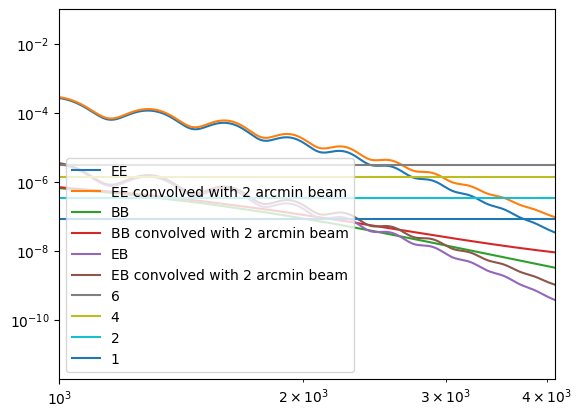

In [21]:
plt.loglog(cl_len['ee'][:6001],label='EE')
plt.loglog(cl_len['ee'][:6001]/bl**2,label='EE convolved with 2 arcmin beam')
plt.loglog(cl_len['bb'][:6001],label='BB')
plt.loglog(cl_len['bb'][:6001]/bl**2,label='BB convolved with 2 arcmin beam')
plt.loglog(cl_len['eb'][:6001],label='EB')
plt.loglog(cl_len['eb'][:6001]/bl**2,label='EB convolved with 2 arcmin beam')
plt.xlim(1000,4096)
plt.axhline(np.radians(6/60)**2,c='C17',label='6')
plt.axhline(np.radians(4/60)**2,c='C18',label='4')
plt.axhline(np.radians(2/60)**2,c='C19',label='2')
plt.axhline(np.radians(1/60)**2,c='C20',label='1')
plt.legend()

In [5]:
q,u = cmb.get_QU(0)

alm2lenmap_spin: using 48 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:12.248568] (36.0%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:00.934264] (2.7%)  
  build_angles                         :  [0:00:13.182889] (38.8%)  
  synthesis general (STANDARD)         :  [0:00:20.581142] (60.6%)  
  polrot (ducc)                        :  [0:00:00.163951] (0.5%)  
  gclm2lenmap                          :  [0:00:33.979848] (100.0%)  
  Total                                :  [0:00:33.980562] d:h:m:s:mus


In [11]:
noise = Noise(basedir,1024)

In [12]:
noise.get_EB(0)

array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         2.30920106e-05+0.00000000e+00j, ...,
         9.14540281e-05-1.33766411e-05j, -1.50896963e-04+1.96190824e-04j,
         7.33726160e-05-7.53095055e-05j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -8.52761297e-05+0.00000000e+00j, ...,
        -1.11157959e-05+3.74785911e-05j,  7.94573759e-05-2.93091851e-04j,
        -4.86492147e-05-6.50574055e-05j]])

In [4]:
sky = Sky(basedir,2048,1,'iso',beta=0.35)

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


In [5]:
elm = sky.get_E(0)

alm2lenmap_spin: using 48 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:45.448906] (45.5%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:01.854160] (1.9%)  
  build_angles                         :  [0:00:47.303132] (47.3%)  
  synthesis general (STANDARD)         :  [0:00:52.012049] (52.0%)  
  polrot (ducc)                        :  [0:00:00.401598] (0.4%)  
  gclm2lenmap                          :  [0:01:39.925740] (100.0%)  
  Total                                :  [0:01:39.927601] d:h:m:s:mus


In [6]:
blm = sky.get_B(0)

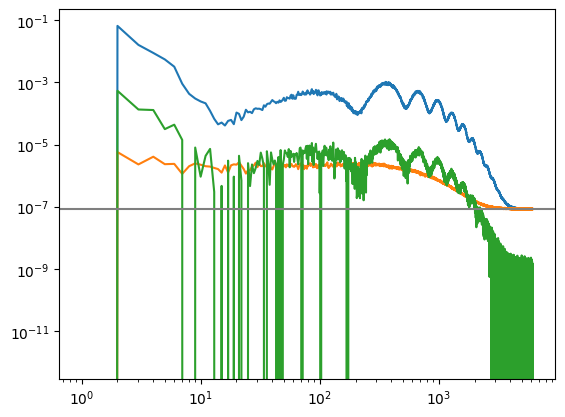

In [8]:
plt.loglog(hp.alm2cl(elm))
plt.loglog(hp.alm2cl(blm))
plt.loglog(hp.alm2cl(elm,blm))
plt.axhline(np.radians(1/60)**2,c='C17',label='6')